# How to plot histogram
- seriestype
`:none, :line, :path, :steppre, :stepmid, :steppost, :sticks, :scatter, :heatmap, :hexbin, :barbins, :barhist, :histogram, :scatterbins, :scatterhist, :stepbins, :stephist, :bins2d, :histogram2d, :histogram3d, :density, :bar, :hline, :vline, :contour, :pie, :shape, :image, :path3d, :scatter3d, :surface, :wireframe, :contour3d, :volume, :mesh3d`

In [34]:
using Plots

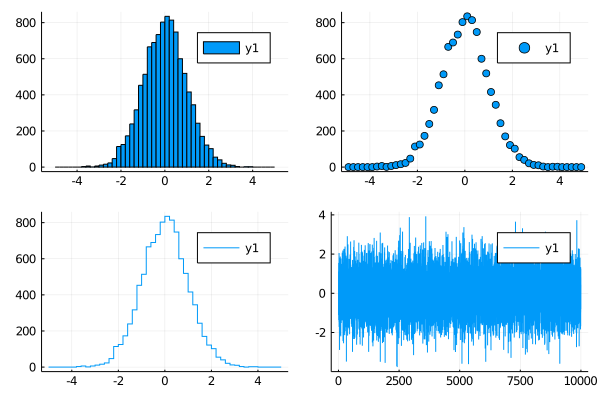

In [59]:
x = randn(10^4)
#plot(x, seriestype=histogram, bins=100, color=:black)
bins = -5:0.2:5
p1 = histogram(x, bins=bins)   #Alternative: plot(x, seriestype=:histogram)
p2 = scatterhist(x, bins=bins) # plot(x, seriestype=:scatterhist)
p3 = stephist(x, bins=bins)    # plot(x, seriestype=:stephist)
p4 = plot(x, bins=bins, seriestype=:line)
plot(p1, p2, p3, p4, layout=(2,2))

## More manual plotting for 1D histogram

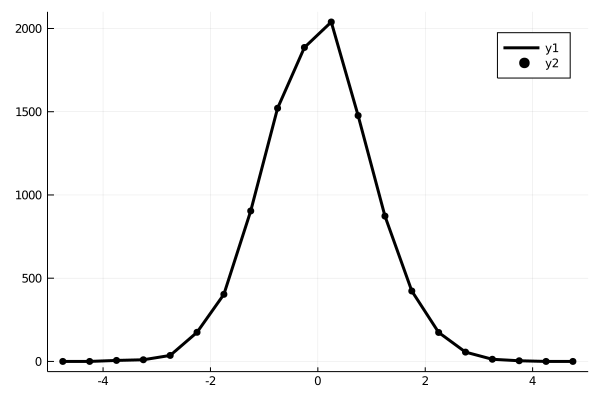

In [114]:
using StatsBase
binsize = 0.5
h = fit(Histogram, x, -5:binsize:5, closed=:left)
mid_pts = [pt+0.5binsize for pt in h.edges[1]] # shift the left edge
plot(mid_pts[1:length(mid_pts)-1], h.weights, lw = 3,  color=:black)
plot!(mid_pts[1:length(mid_pts)-1], h.weights, seriestype=:scatter, color=:black)

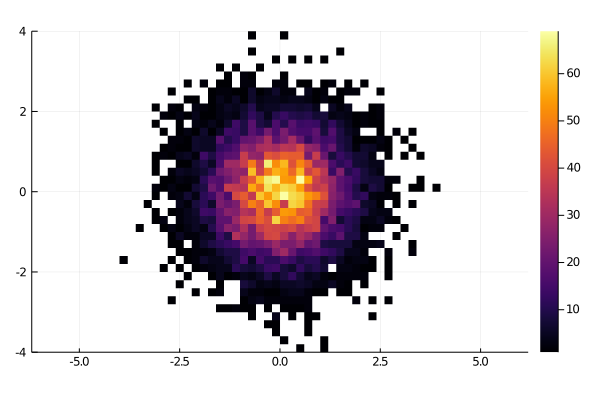

In [1]:
pr = randn(10^4,2)
xbins = 50; ybins=50
plot(r[:,1],r[:,2], seriestype=:histogram2d, bins=(xbins,ybins), aspect_ratio=1)

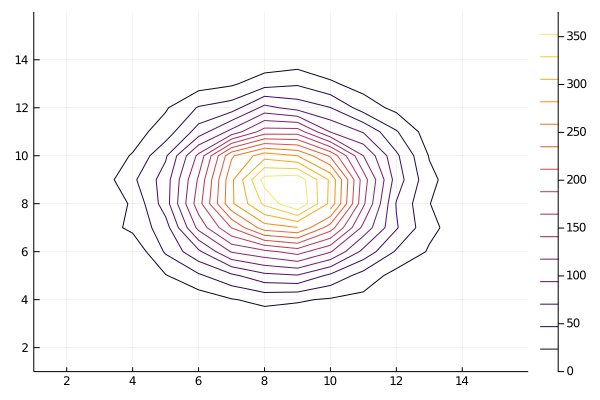

In [7]:
using StatsBase
h = fit(Histogram, (r[:,1], r[:,2]))
contour(h.weights)

In [3]:
?fit

search: fit fit! fitted isfitted filter filter! confint first firstindex



```
fit(Histogram, data[, weight][, edges]; closed=:left, nbins)
```

Fit a histogram to `data`.

# Arguments

  * `data`: either a vector (for a 1-dimensional histogram), or a tuple of vectors of equal length (for an *n*-dimensional histogram).
  * `weight`: an optional `AbstractWeights` (of the same length as the data vectors), denoting the weight each observation contributes to the bin. If no weight vector is supplied, each observation has weight 1.
  * `edges`: a vector (typically an `AbstractRange` object), or tuple of vectors, that gives the edges of the bins along each dimension. If no edges are provided, these are determined from the data.

# Keyword arguments

  * `closed`: if `:left` (the default), the bin intervals are left-closed [a,b); if `:right`, intervals are right-closed (a,b].
  * `nbins`: if no `edges` argument is supplied, the approximate number of bins to use along each dimension (can be either a single integer, or a tuple of integers).

# Examples

```julia
# Univariate
h = fit(Histogram, rand(100))
h = fit(Histogram, rand(100), 0:0.1:1.0)
h = fit(Histogram, rand(100), nbins=10)
h = fit(Histogram, rand(100), weights(rand(100)), 0:0.1:1.0)
h = fit(Histogram, [20], 0:20:100)
h = fit(Histogram, [20], 0:20:100, closed=:right)

# Multivariate
h = fit(Histogram, (rand(100),rand(100)))
h = fit(Histogram, (rand(100),rand(100)),nbins=10)
```

---

Fit a statistical model.

---

```
fit(ZScoreTransform, X; dims=nothing, center=true, scale=true)
```

Fit standardization parameters to vector or matrix `X` and return a `ZScoreTransform` transformation object.

# Keyword arguments

  * `dims`: if `1` fit standardization parameters in column-wise fashion; if `2` fit in row-wise fashion. The default is `nothing`, which is equivalent to `dims=2` with a deprecation warning.
  * `center`: if `true` (the default) center data so that its mean is zero.
  * `scale`: if `true` (the default) scale the data so that its variance is equal to one.

# Examples

```jldoctest
julia> using StatsBase

julia> X = [0.0 -0.5 0.5; 0.0 1.0 2.0]
2×3 Array{Float64,2}:
 0.0  -0.5  0.5
 0.0   1.0  2.0

julia> dt = fit(ZScoreTransform, X, dims=2)
ZScoreTransform{Float64}(2, 2, [0.0, 1.0], [0.5, 1.0])

julia> StatsBase.transform(dt, X)
2×3 Array{Float64,2}:
  0.0  -1.0  1.0
 -1.0   0.0  1.0
```

---

```
fit(UnitRangeTransform, X; dims=nothing, unit=true)
```

Fit a scaling parameters to vector or matrix `X` and return a `UnitRangeTransform` transformation object.

# Keyword arguments

  * `dims`: if `1` fit standardization parameters in column-wise fashion;

if `2` fit in row-wise fashion. The default is `nothing`.

  * `unit`: if `true` (the default) shift the minimum data to zero.

# Examples

```jldoctest
julia> using StatsBase

julia> X = [0.0 -0.5 0.5; 0.0 1.0 2.0]
2×3 Array{Float64,2}:
 0.0  -0.5  0.5
 0.0   1.0  2.0

julia> dt = fit(UnitRangeTransform, X, dims=2)
UnitRangeTransform{Float64}(2, 2, true, [-0.5, 0.0], [1.0, 0.5])

julia> StatsBase.transform(dt, X)
2×3 Array{Float64,2}:
 0.5  0.0  1.0
 0.0  0.5  1.0
```
